In [1]:
import tensorflow as tf
from keras import datasets, layers, callbacks, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
series = df['close'].values.reshape(-1, 1)

In [6]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [7]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

print('X shape:', np.array(X).shape)
print('Y shape:', np.array(Y).shape)

X shape: (1249, 10, 1)
Y shape: (1249,)


In [8]:
i = layers.Input(shape=(T, D))
x = layers.LSTM(5, activation='relu')(i)
x = layers.Dense(1)(x)
model = models.Model(i, x)

model.compile(
    optimizer=optimizers.Adam(0.1),
    loss='mse'
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.9960 - val_loss: 4.5211
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2728 - val_loss: 1.5294
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0556 - val_loss: 0.5674
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - val_loss: 0.3045
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - val_loss: 0.2127
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - val_loss: 0.1762
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - val_loss: 0.1465
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - val_loss: 0.1271
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - val_loss: 0.1232
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.1193
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - val_loss: 0.1099
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - val_l

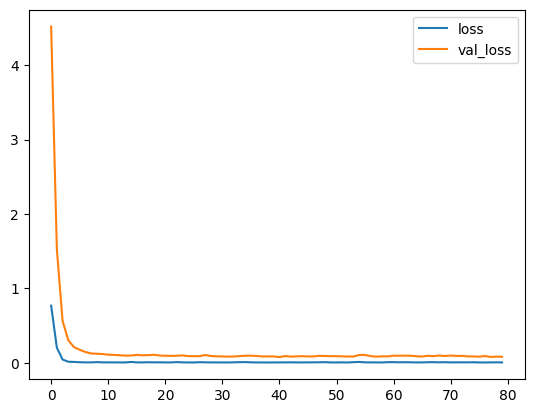

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [10]:
# # plt.plot(r.history)
# print(r.history.keys())
# dir(r.history)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
(1249, 1)


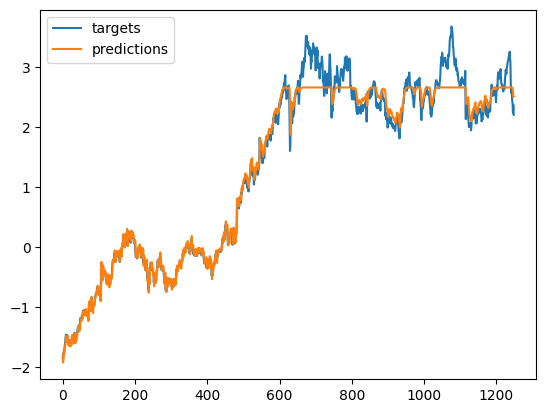

In [11]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [12]:
# This code does not excecute
# # Multi-step forecast
# validation_target = Y[-N//2:]
# validation_predictions = []
#
# last_x = X[-N//2]
#
# while len(validation_predictions) < len(validation_target):
#     p = model.predict(last_x.reshape(1, T, 1), verbose=0)[0, 0]
#
#     validation_predictions.append(p)
#
#     last_x = np.roll(last_x, -1)
#     last_x[-1] = p
#
# plt.plot(validation_target, label='forecast target')
# plt.plot(validation_predictions, label='forecast prediction')
# plt.legend()
# plt.show()

In [13]:
df['prev_close'] = df['close'].shift(1)

In [14]:
df.head()

,date,open,high,low,close,volume,Name,prev_close
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [15]:
df['return'] = (df['close'] - df['prev_close']) / df['prev_close']

In [16]:
df.head()

,date,open,high,low,close,volume,Name,prev_close,return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

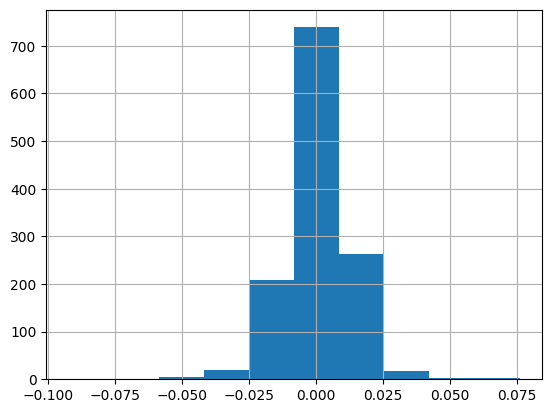

In [17]:
df['return'].hist()

In [19]:
series_2 = df['return'].values[1:].reshape(-1, 1)

In [20]:
scaler = StandardScaler()
scaler.fit(series_2[:len(series_2)//2])
series_2 = scaler.transform(series_2).flatten()

In [21]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series_2) - T):
    x = series_2[t:t+T]
    X.append(x)
    y = series_2[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

print('X shape:', np.array(X).shape)
print('Y shape:', np.array(Y).shape)

X shape: (1248, 10, 1)
Y shape: (1248,)


In [22]:
i = layers.Input(shape=(T, D))
x = layers.LSTM(5, activation='relu')(i)
x = layers.Dense(1)(x)

model = models.Model(i, x)

model.compile(
    optimizer=optimizers.Adam(0.1),
    loss='mse'
)

r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
    verbose=0
)

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.9682 - val_loss: 1.1280
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0418 - val_loss: 1.1346
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0360 - val_loss: 1.1473
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9667 - val_loss: 1.1407
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0009 - val_loss: 1.1506
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0515 - val_loss: 1.1360
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1165 - val_loss: 1.1810
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9428 - val_loss: 1.1580
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9246 - val_loss: 1.1551
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0488 - val_loss: 1.1990
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2316 - val_loss: 1.1282
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9704 - val_l

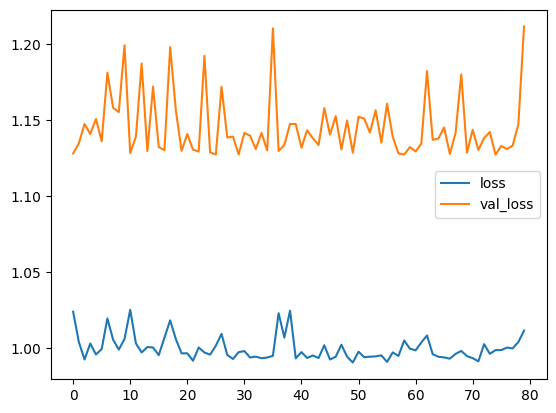

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
(1248, 1)


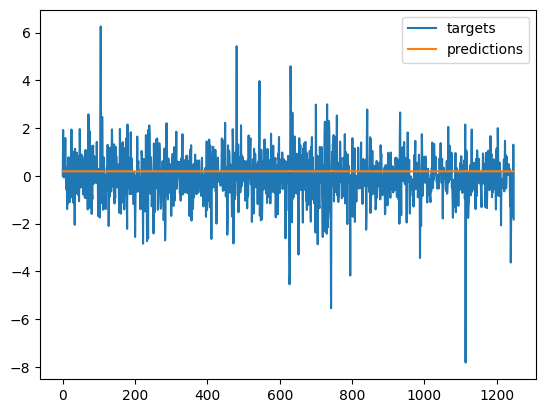

In [24]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

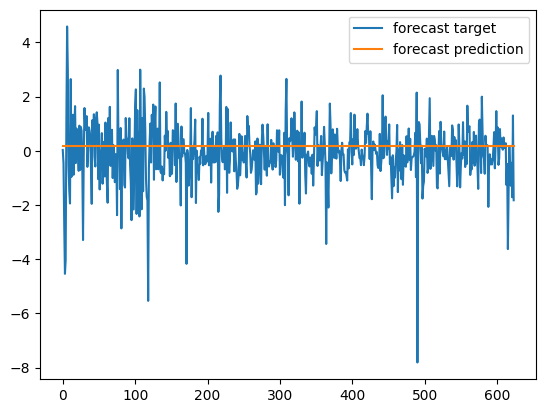

In [25]:
# The code is too slow
# # Multi-step forecast
# validation_target = Y[-N//2:]
# validation_predictions = []
#
# last_x = X[-N//2]
#
# while len(validation_predictions) < len(validation_target):
#     p = model.predict(last_x.reshape(1, T, 1), verbose=0)[0, 0]
#
#     validation_predictions.append(p)
#
#     last_x = np.roll(last_x, -1)
#     last_x[-1] = p
#
# plt.plot(validation_target, label='forecast target')
# plt.plot(validation_predictions, label='forecast prediction')
# plt.legend()
# plt.show()

In [ ]:
# I am not going to continue with this notebook